In [77]:
# Rasmus Svedberg rassev-1@student.ltu.se
import numpy as np
from matplotlib import pyplot as plt


In [3]:
from keras.datasets import mnist

Task 1.1

Shape (25, 32, 32, 3)


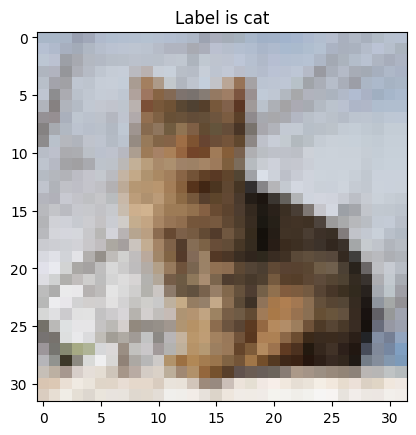

In [4]:
import os
from PIL import Image

mydataset = "mydataset"

img_size = (32,32)

images = []
lables = []

for folder in os.listdir(mydataset):
    folder_path = os.path.join(mydataset, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = Image.open(img_path).convert('RGB')
            img_resized = img.resize(img_size)
            img_array = np.array(img_resized)

            images.append(img_resized)
            lables.append(folder)

images = np.array(images)
lables = np.array(lables)

print("Shape", images.shape)

index = 1

plt.title('Label is {Label}'.format(Label=lables[index]))
plt.imshow(images[index])

plt.show()
plt.close()


Task 1.1 Preprocessing

Reshaped images: (25, 3072)


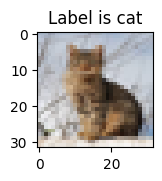

Xmin 0.0 Xmax: 1.0


In [5]:
X = images.reshape(images.shape[0], images.shape[1]* images.shape[2]* images.shape[3])

print("Reshaped images:", X.shape)

index = 1

plt.figure(figsize=(1.5,1.5))
plt.title('Label is {Label}'.format(Label=lables[index]))
plt.imshow(images[index])

plt.show()
plt.close()

X_norm = X / 255.0
print("Xmin", X_norm.min(), "Xmax:", X_norm.max())


In [6]:
X_normer = X_norm.mean(axis=0)

print("XNorm", X_normer.shape)
print("Normer:", X_normer)

X_normest = X_norm - X_normer
print("Normest:", X_normest)

cov = np.cov(X_normest, rowvar=False)
print("Cov shape:", cov.shape)

XNorm (3072,)
Normer: [0.63294118 0.65317647 0.62776471 ... 0.5414902  0.55482353 0.4092549 ]
Normest: [[-0.63294118 -0.65317647 -0.62776471 ... -0.5414902  -0.55482353
  -0.4092549 ]
 [ 0.02980392  0.06447059  0.15654902 ...  0.40360784  0.37458824
   0.50447059]
 [-0.0172549  -0.10023529 -0.16501961 ... -0.02776471 -0.09992157
  -0.03278431]
 ...
 [ 0.15529412  0.10760784  0.1094902  ... -0.31796078 -0.36658824
  -0.25631373]
 [ 0.30431373  0.12721569  0.07419608 ... -0.17678431  0.06870588
  -0.06415686]
 [ 0.06509804  0.08407843 -0.0787451  ... -0.20031373 -0.10384314
  -0.1465098 ]]
Cov shape: (3072, 3072)


In [9]:
U,S,V = np.linalg.svd(cov)
print("U shape:", U.shape, "S shape:", S.shape)

print(np.diag(S))
print("\nshape", np.diag(S).shape)

U shape: (3072, 3072) S shape: (3072,)
[[8.83559086e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.22184310e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.55958675e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.89030998e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.97132762e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.80653524e-15]]

shape (3072, 3072)


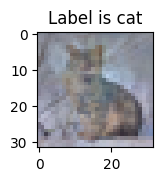

In [13]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_normest.T).T

X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

index = 1

plt.figure(figsize=(1.5,1.5))
plt.title('Label is {Label}'.format(Label=lables[index]))
plt.imshow(X_ZCA_rescaled[index].reshape(32,32,3))

plt.show()
plt.close()

Task 1.2

In [ ]:
data = np.load("vecs.npy", allow_pickle=True).item()

key = list(data.keys())[0]
position_dict = data[key]

embeddings = []
lables = []

for digit, emb in position_dict.items():
    for c in emb:
        embeddings.append(c)
        lables.append(int(digit))

embeddings = np.array(embeddings, dtype=object)
lables = np.array(lables)

print("Embeddings shape:", embeddings.shape)
print("Labels shape:", lables.shape)

print("Lables:", lables)
print("Embedding vector:", embeddings[0])

Embeddings shape: (1258, 1024)
Labels shape: (1258,)
Lables: [0 0 0 ... 9 9 9]
Embedding vector: [-0.0 -0.0 -0.0 ... -0.0 -0.0 9.2278470993042]


In [36]:
n_shape = embeddings.shape[0]

permuting = np.random.permutation(n_shape)

embeddings_shuffled = embeddings[permuting]
lables_shuffled = lables[permuting]

print("Lables:", lables)
print("Lables:", lables_shuffled)

print("Embedding vector:", embeddings[0])
print("Embedding vector:", embeddings_shuffled[0])

Lables: [0 0 0 ... 9 9 9]
Lables: [2 8 1 ... 9 0 9]
Embedding vector: [-0.0 -0.0 -0.0 ... -0.0 -0.0 9.2278470993042]
Embedding vector: [-0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0]


Task 2.1

In [70]:
# This is the given code for 1-nn i just moved it
# OCD Fixed spacing >:(
(Xtr, Ltr), (X_test, L_test) = mnist.load_data()

Image = Xtr[0,:,:]
Label = Ltr[0]
Image1 = Xtr[1,:,:]
Label1 = Ltr[1]


#Traing phase
num_sample = 500

Tr_set = Xtr[:num_sample,:,:]
Ltr_set = Ltr[:num_sample]

Tr_set = Tr_set.reshape(num_sample, Tr_set.shape[1] * Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(np.float32)
Tr_set.shape

def predict(X):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances = np.sum(np.abs(Tr_set - X[i, :]), axis=1)
        print("Distances:", distances[:5])
        min_index = np.argmin(distances)
        Lpred[i] = Ltr_set[min_index]
    return Lpred

Test_images = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
Labels_predicted = predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted == L_test))

Distances: [29039 33889 26589 24025 26520]
Distances: [29651 35781 29249 23613 29948]
Distances: [27382 31720 24676 15968 24863]
Distances: [27375 25057 26973 23897 26136]
Distances: [32352 33618 21966 24010 26761]
Distances: [28518 32856 25556 17616 24975]
Distances: [32197 39095 26419 26415 27630]
Distances: [30527 37425 25773 23721 26728]
Distances: [28279 35177 27365 25825 26784]
Distances: [33039 33537 27773 23929 25400]
Distances: [31812 29750 28082 27310 30829]
Distances: [34862 35616 29852 26008 28503]
Distances: [28962 29716 24720 23436 21835]
Distances: [29862 29080 27924 26128 28111]
Distances: [27966 31280 22444 17832 24423]
Distances: [32587 35133 29369 27061 31348]
Distances: [30163 35013 26689 25661 25340]
Distances: [30457 33515 25703 25955 27938]
Distances: [35356 38926 31626 29318 32581]
Distances: [31203 33749 24913 23373 21260]
Distances: [29149 32207 26955 23879 25606]
Distances: [28262 34136 25044 24528 28559]
Distances: [33315 35093 26769 24205 27980]
Distances: 

1-NN with L2

In [74]:
(Xtr, Ltr), (X_test, L_test) = mnist.load_data()

Image = Xtr[0,:,:]
Label = Ltr[0]
Image1 = Xtr[1,:,:]
Label1 = Ltr[1]


#Traing phase
num_sample = 500

Tr_set = Xtr[:num_sample,:,:]
Ltr_set = Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(np.float32) # Fixed to float32

def predict(X):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances = np.sqrt(np.sum((Tr_set - X[i, :]) ** 2, axis=1)) # L2 Distance
        min_index = np.argmin(distances)
        Lpred[i] = Ltr_set[min_index]
    return Lpred

Test_images = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
Labels_predicted = predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted == L_test))

Accuracy: 0.8294


K-NN

In [76]:
(Xtr, Ltr), (X_test, L_test) = mnist.load_data()

Image = Xtr[0,:,:]
Label = Ltr[0]
Image1 = Xtr[1,:,:]
Label1 = Ltr[1]


#Traing phase
num_sample = 500
Tr_set = Xtr[:num_sample,:,:]
Ltr_set = Ltr[:num_sample]

Tr_set = Tr_set.reshape(num_sample, Tr_set.shape[1] * Tr_set.shape[2]).astype(np.float32) # Fixed to float32

def predict(X):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    k = 5  # Number of nearest neighbors
    
    for i in range(num_test):
        distances = np.sqrt(np.sum((Tr_set - X[i, :]) ** 2, axis=1)) # L2 Distance
        knearest_index = np.argsort(distances)[:k] # Index for k nearest neighbors
        values, counts = np.unique(Ltr_set[knearest_index], return_counts=True) # Get the most common lable
        Lpred[i] = values[np.argmax(counts)] # Assign the most common lable
    return Lpred

Test_images = X_test.reshape(X_test.shape[0],X_test.shape[1] * X_test.shape[2])
Labels_predicted = predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted == L_test))

Accuracy: 0.7953


Task 2.2

In [ ]:
(Xtr, Ltr), (X_test, L_test) = mnist.load_data()

#Traing phase
num_sample = 500

Tr_set = Xtr[:num_sample,:,:]
Ltr_set = Ltr[:num_sample]

Tr_set = Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(np.float32) # Fixed to float32

def predict(X, knn):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)
    k = knn  # Number of nearest neighbors
    
    for i in range(num_test):
        distances = np.sqrt(np.sum((Tr_set - X[i, :]) ** 2, axis=1)) # L2 Distance
        knearest_index = np.argsort(distances)[:k] # Index for k nearest neighbors
        values, counts = np.unique(Ltr_set[knearest_index], return_counts=True) # Get the most common lable
        Lpred[i] = values[np.argmax(counts)] # Assign the most common lable
    return Lpred



def kfold(knn): # 3 Fold 
    fold_size = num_sample // 3
    accuracies = []

    global Tr_set, Ltr_set

    for fold in range(3): # Loop through folds
        start = fold * fold_size # Calculate start and end indices for validation fold
        end = start + fold_size

        X_val = Tr_set[start:end]
        L_val = Ltr_set[start:end]

        X_train = np.concatenate((Tr_set[:start], Tr_set[end:]), axis=0) # Training data is everything except validation fold
        L_train = np.concatenate((Ltr_set[:start], Ltr_set[end:]), axis=0) # Corresponding labels

        old_Tr = Tr_set 
        old_Ltr = Ltr_set
        Tr_set = X_train
        Ltr_set = L_train

        L_val_predicted = predict(X_val, knn) # Run predict on validation set
        accuracy = np.mean(L_val_predicted == L_val)
        accuracies.append(accuracy)
        #print(f"Fold {fold + 1}, Accuracy: {accuracy}")

        Tr_set = old_Tr
        Ltr_set = old_Ltr

    return np.mean(accuracies)

for k in range(1, 10): # Loop through the k values
    kfold_accuracy = kfold(knn = k)
    print(f"K={k}, K-Fold Accuracy:", kfold_accuracy)


Test_images = X_test.reshape(X_test.shape[0],X_test.shape[1] * X_test.shape[2]) # Run one test set with best K (in our case 1)
Labels_predicted = predict(Test_images, knn=1)

print("Accuracy for our optimal k (1):", np.mean(Labels_predicted == L_test))

K=1, K-Fold Accuracy: 0.8333333333333334
K=2, K-Fold Accuracy: 0.7891566265060241
K=3, K-Fold Accuracy: 0.8232931726907631
K=4, K-Fold Accuracy: 0.8112449799196787
K=5, K-Fold Accuracy: 0.8152610441767069
K=6, K-Fold Accuracy: 0.8072289156626505
K=7, K-Fold Accuracy: 0.8012048192771085
K=8, K-Fold Accuracy: 0.7931726907630523
K=9, K-Fold Accuracy: 0.7971887550200804
Accuracy for our optimal k (1): 0.8294


Task 3.1

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

irisdata = datasets.load_iris() # Load iris
X = irisdata.data
y = irisdata.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Split data


#  Linear Kernel

linear_svc_ovo = svm.SVC(kernel='linear', decision_function_shape="ovo") # SVM with linear kernel (ovo)
linear_svc_ovo.fit(X_train, y_train) 
y_pred_lin_ovo = linear_svc_ovo.predict(X_test) 
accuracy_lin_ovo = np.mean(y_pred_lin_ovo == y_test) 


linear_svc_ovr = svm.SVC(kernel='linear', decision_function_shape="ovr") # SVM with linear kernel (ovr)
linear_svc_ovr.fit(X_train, y_train) 
y_pred_lin_ovr = linear_svc_ovr.predict(X_test) 
accuracy_lin_ovo = np.mean(y_pred_lin_ovr == y_test) 



# RBF Kernel

rbf_svc_ovo = svm.SVC(kernel='rbf', decision_function_shape="ovo") # SVM with rbf kernel (ovo)
rbf_svc_ovo.fit(X_train, y_train) 
y_pred_rbf_ovo = rbf_svc_ovo.predict(X_test) 
accuracy_rbf_ovo = np.mean(y_pred_rbf_ovo == y_test) 


rbf_svc_ovr = svm.SVC(kernel='rbf', decision_function_shape="ovr") # SVM with rbf kernel (ovr)
rbf_svc_ovr.fit(X_train, y_train) 
y_pred_rbf_ovr = rbf_svc_ovr.predict(X_test) 
accuracy_rbf_ovr = np.mean(y_pred_rbf_ovr == y_test) 



# Polynomial Kernel

pol_svc_ovo = svm.SVC(kernel='poly', decision_function_shape="ovo") # SVM with polynomial kernel (ovo)
pol_svc_ovo.fit(X_train, y_train)
y_pred_pol_ovo = pol_svc_ovo.predict(X_test)
accuracy_pol_ovo = np.mean(y_pred_pol_ovo == y_test)


pol_svc_ovr = svm.SVC(kernel='poly', decision_function_shape="ovr") # SVM with polynomial kernel (ovr)
pol_svc_ovr.fit(X_train, y_train)
y_pred_pol_ovr = pol_svc_ovr.predict(X_test)
accuracy_pol_ovr = np.mean(y_pred_pol_ovr == y_test)




Confusion Matrix (Linear OVO):
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Confusion Matrix (RBF OVO):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix (Poly OVO):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix (Linear OVR):
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Confusion Matrix (RBF OVR):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix (Poly OVR):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Linear Accuracy (ovo): 1.0
Linear Accuracy (ovr): 1.0
RBF Accuracy (ovo): 0.9666666666666667
RBF Accuracy (ovr): 0.9666666666666667
Poly Accuracy (ovo): 0.9666666666666667
Poly Accuracy (ovr): 0.9666666666666667
Linear F1 Score: 1.0


In [106]:
# Confusion Matrices


confusion_lin_ovo = confusion_matrix(y_test, y_pred_lin_ovo)
confusion_rbf_ovo = confusion_matrix(y_test, y_pred_rbf_ovo)
confusion_pol_ovo = confusion_matrix(y_test, y_pred_pol_ovo)
confusion_lin_ovr = confusion_matrix(y_test, y_pred_lin_ovr)
confusion_rbf_ovr = confusion_matrix(y_test, y_pred_rbf_ovr)
confusion_pol_ovr = confusion_matrix(y_test, y_pred_pol_ovr)



print("Confusion Matrix (Linear OVO):\n", confusion_lin_ovo)
print("Confusion Matrix (RBF OVO):\n", confusion_rbf_ovo)
print("Confusion Matrix (Poly OVO):\n", confusion_pol_ovo)
print("Confusion Matrix (Linear OVR):\n", confusion_lin_ovr)
print("Confusion Matrix (RBF OVR):\n", confusion_rbf_ovr)
print("Confusion Matrix (Poly OVR):\n", confusion_pol_ovr)

Confusion Matrix (Linear OVO):
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Confusion Matrix (RBF OVO):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix (Poly OVO):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix (Linear OVR):
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Confusion Matrix (RBF OVR):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix (Poly OVR):
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [107]:
# Accuracies

print("Linear Accuracy (ovo):", accuracy_lin_ovo)
print("Linear Accuracy (ovr):", accuracy_lin_ovo)
print("RBF Accuracy (ovo):", accuracy_rbf_ovo)
print("RBF Accuracy (ovr):", accuracy_rbf_ovr)
print("Poly Accuracy (ovo):", accuracy_pol_ovo)
print("Poly Accuracy (ovr):", accuracy_pol_ovr)

Linear Accuracy (ovo): 1.0
Linear Accuracy (ovr): 1.0
RBF Accuracy (ovo): 0.9666666666666667
RBF Accuracy (ovr): 0.9666666666666667
Poly Accuracy (ovo): 0.9666666666666667
Poly Accuracy (ovr): 0.9666666666666667


In [112]:
# precision and recall
precision_lin_ovo = np.diag(confusion_lin_ovo) / np.sum(confusion_lin_ovo, axis=0) # Note 0 for columns 1 for rows
recall_lin_ovo = np.diag(confusion_lin_ovo) / np.sum(confusion_lin_ovo, axis=1)

precision_rbf_ovo = np.diag(confusion_rbf_ovo) / np.sum(confusion_rbf_ovo, axis=0)
recall_rbf_ovo = np.diag(confusion_rbf_ovo) / np.sum(confusion_rbf_ovo, axis=1)

precision_pol_ovo = np.diag(confusion_pol_ovo) / np.sum(confusion_pol_ovo, axis=0)
recall_pol_ovo = np.diag(confusion_pol_ovo) / np.sum(confusion_pol_ovo, axis=1)

# F1-scores

print("Linear F1 Score:", 2 * (precision_lin_ovo * recall_lin_ovo) / (precision_lin_ovo + recall_lin_ovo))
print("RBF F1 Score:", 2 * (precision_rbf_ovo * recall_rbf_ovo) / (precision_rbf_ovo + recall_rbf_ovo))
print("Poly F1 Score:", 2 * (precision_pol_ovo * recall_pol_ovo) / (precision_pol_ovo + recall_pol_ovo))

Linear F1 Score: [1. 1. 1.]
RBF F1 Score: [1.         0.96       0.92307692]
Poly F1 Score: [1.         0.96       0.92307692]


Linear is best for both accuracy and F1 it seems

In [118]:
support_vectors_lin = linear_svc_ovr.support_vectors_
support_vectors_rbf = rbf_svc_ovr.support_vectors_
support_vectors_pol = pol_svc_ovr.support_vectors_

print(support_vectors_lin)
#print(support_vectors_pol)
#print(support_vectors_rbf)

[[5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]
 [4.8 3.4 1.9 0.2]
 [6.1 3.  4.6 1.4]
 [6.5 2.8 4.6 1.5]
 [6.  3.4 4.5 1.6]
 [5.7 2.8 4.5 1.3]
 [6.  2.7 5.1 1.6]
 [6.9 3.1 4.9 1.5]
 [5.9 3.2 4.8 1.8]
 [4.9 2.4 3.3 1. ]
 [6.1 2.9 4.7 1.4]
 [6.2 2.2 4.5 1.5]
 [6.3 2.5 4.9 1.5]
 [6.  2.2 5.  1.5]
 [6.2 2.8 4.8 1.8]
 [6.3 2.7 4.9 1.8]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.  3.  4.8 1.8]
 [5.9 3.  5.1 1.8]
 [4.9 2.5 4.5 1.7]
 [7.2 3.  5.8 1.6]
 [6.3 2.8 5.1 1.5]]


Features 2 vs 3

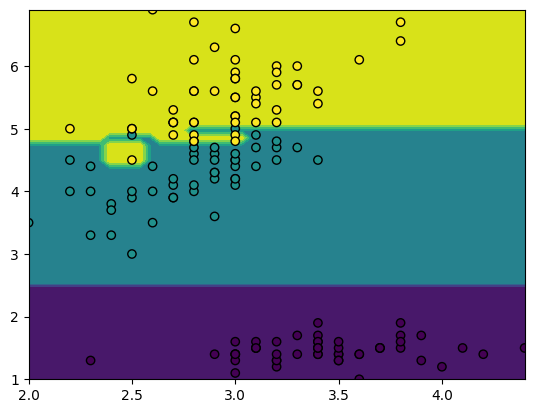

In [124]:
# This was inspired by the example in the sklearn documentation "https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html"
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


feature_2, feature_3 = np.meshgrid(
    np.linspace(irisdata.data[:, 1].min(), irisdata.data[:, 1].max()),
    np.linspace(irisdata.data[:, 2].min(), irisdata.data[:, 2].max())
)
grid = np.vstack([feature_2.ravel(), feature_3.ravel()]).T
tree = DecisionTreeClassifier().fit(irisdata.data[:, [1,2]], irisdata.target)
y_pred = np.reshape(tree.predict(grid), feature_2.shape)
display = DecisionBoundaryDisplay(
    xx0 = feature_2, xx1 = feature_3, response = y_pred
)
display.plot()
display.ax_.scatter(
    irisdata.data[:, 1], irisdata.data[:, 2], c=irisdata.target, edgecolor="black"
)
plt.show()

Features 3 vs 4

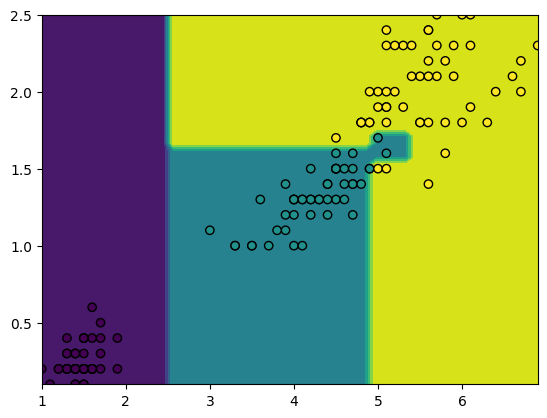

In [125]:
# This was inspired by the example in the sklearn documentation "https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html"
feature_3, feature_4 = np.meshgrid(
    np.linspace(irisdata.data[:, 2].min(), irisdata.data[:, 2].max()),
    np.linspace(irisdata.data[:, 3].min(), irisdata.data[:, 3].max())
)
grid = np.vstack([feature_3.ravel(), feature_4.ravel()]).T
tree = DecisionTreeClassifier().fit(irisdata.data[:, [2,3]], irisdata.target)
y_pred = np.reshape(tree.predict(grid), feature_3.shape)
display = DecisionBoundaryDisplay(
    xx0 = feature_3, xx1 = feature_4, response = y_pred
)
display.plot()
display.ax_.scatter(
    irisdata.data[:, 2], irisdata.data[:, 3], c=irisdata.target, edgecolor="black"
)
plt.show()

Task 4.1

Dim 50 = 63.75%, 60.0%, 60.0%  
Dim 500 = 68.75%, 65.0%, 67.5%  
Dim 5000 = 66.25%  

Higher dimentions seem to help up to certain point, between 50 and 500 the time difference was neglectable while preformance improved. However, with 5000 dimentions the result actaully got slightely worse or at least even to 500 and it took a lot longer. In conclution find the sweetspot. Note: only ran 5000 once since it took to long.

Task 4.2

The code takes 2 words to the left and 2 words to the right to create context, this is hard coded in and could be done more dynamicaly where we instead have a variable we change according to how many words we want to use for context.

Dim 2000 = 72.5%, 76.25%, 72.5%  
Dim 4000 = 71.25%, 75.0%, 71.25%  
Dim 8000 = 75.0%, 72.5%, 73.75%  

Higher dimentions does not improve the result which is expected for random indexing since it is random vectors updated by addition, so higher dimentions doesnt give more context.  

Conclusion:

Overall RI was more accurate which for me was kind of surprising since it doesnt use learning, however i feel like if we let the word2vec run for more than 4 epochs it would outpreform the random indexing. This of course comes at a cost since now they were somewhat similar in runtime but if we would crank up the number of epoch the word2vector would get drastically more time consuming and is also more computationally heavy.
